# **Project - TAAC/MECD/FEUP**
<br>
University of Porto - School of Engineering <br>
Master’s degree in Data Science & Engineering (MECD) – FEUP<br>
<br>
Advanced Topics in Computational Learning - TAAC<br>
December 2023 <br>
<br>
Authors: Paulo Portela (up202200871), Miguel Veloso (up202202463) and Jorge Vieira(up202204385)
<br>

# **Context**

Add context...

## **1. Library and Data Import**

In [3]:
!pip install inflect bs4 contractions torchtext wordcloud transformers

  Using cached inflect-7.0.0-py3-none-any.whl.metadata (21 kB)
  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached contractions-0.1.73-py2.py3-none-any.whl (8.7 kB)
     ---------------------------------------- 0.0/65.6 kB ? eta -:--:--
     ---------------------------------------- 65.6/65.6 kB 3.5 MB/s eta 0:00:00
  Using cached textsearch-0.0.24-py2.py3-none-any.whl (7.6 kB)
  Using cached anyascii-0.3.2-py3-none-any.whl (289 kB)
Using cached inflect-7.0.0-py3-none-any.whl (34 kB)
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.9 MB 5.9 MB/s eta 0:00:01
   ---------------- ----------------------- 0.8/1.9 MB 8.3 MB/s eta 0:00:01
   --------------------- ------------------ 1.1/1.9 MB 8.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.4/1.9 MB 7.2 MB/s eta 0:00:01
   ------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.1 requires torch==2.1.1, but you have torch 2.1.2 which is incompatible.
torchvision 0.16.1 requires torch==2.1.1, but you have torch 2.1.2 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\pport\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [1]:
import os
import pandas as pd
import numpy as np
import re
import sys
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
from tabulate import tabulate
from tqdm import tqdm
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import contractions
from bs4 import BeautifulSoup
import inflect
import warnings
import random
import functools

#Pytorch
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
from transformers import AutoModel, BertTokenizerFast, AutoTokenizer, pipeline, AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.utils import class_weight

# Download necessary NLTK data
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')


# Set of English stopwords
stop_words = set(stopwords.words("english"))

# Supress warnings (use with caution)
warnings.filterwarnings('ignore')

c:\Users\pport\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pport\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pport\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pport\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pport\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pport\AppData\Roaming\nltk

## **2. Exploratory Data Analysis (EDA)**

### **2.1 Initial Data Analysis and Structure Overview**

In [2]:
df = pd.read_csv('tweet_emotions.csv', delimiter=',')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [ ]:
def basic_eda(df, row_limit=5, list_elements_limit=10):
    ### rows and columns
    print('Info : There are {} columns in the dataset'.format(df.shape[1]))
    print('Info : There are {} rows in the dataset'.format(df.shape[0]))
    
    print("==================================================")
    
    ## data types
    print("\nData type information of different columns")
    dtypes_df = pd.DataFrame(df.dtypes).reset_index().rename(columns={0:'dtype', 'index':'column_name'})
    cat_df = dtypes_df[dtypes_df['dtype']=='object']
    num_df = dtypes_df[dtypes_df['dtype']!='object']
    print('Info : There are {} categorical columns'.format(len(cat_df)))
    print('Info : There are {} numerical columns'.format(len(dtypes_df)-len(cat_df)))
    
    if list_elements_limit >= len(cat_df):
        print("Categorical columns : ", list(cat_df['column_name']))
    else:
        print("Categorical columns : ", list(cat_df['column_name'])[:list_elements_limit])
        
    if list_elements_limit >= len(num_df):
        print("Numerical columns : ", list(num_df['column_name']))
    else:
        print("Numerical columns : ", list(num_df['column_name'])[:list_elements_limit])
    
    #dtypes_df['dtype'].value_counts().plot.bar()
    display(dtypes_df.head(row_limit))
    
    print("==================================================")
    print("\nDescription of numerical variables")
    
    #### Describibg numerical columns
    desc_df_num = df[list(num_df['column_name'])].describe().T.reset_index().rename(columns={'index':'column_name'})
    display(desc_df_num.head(row_limit))
    
    print("==================================================")
    print("\nDescription of categorical variables")
    
    desc_df_cat = df[list(cat_df['column_name'])].describe().T.reset_index().rename(columns={'index':'column_name'})
    display(desc_df_cat.head(row_limit))
    
    return

In [29]:
basic_eda(df)

Info : There are 3 columns in the dataset
Info : There are 40000 rows in the dataset

Data type information of different columns
Info : There are 2 categorical columns
Info : There are 1 numerical columns
Categorical columns :  ['sentiment', 'content']
Numerical columns :  ['tweet_id']


,column_name,dtype
0,tweet_id,int64
1,sentiment,object
2,content,object



Description of numerical variables


,column_name,count,mean,std,min,25%,50%,75%,max
0,tweet_id,40000.0,1.845184e+09,1.188579e+08,1.693956e+09,1.751431e+09,1.855443e+09,1.962781e+09,1.966441e+09



Description of categorical variables


,column_name,count,unique,top,freq
0,sentiment,40000,13,neutral,8638
1,content,40000,39827,I just received a mothers day card from my lov...,14


### **2.2 Check the existance and the number of Null Values and Duplicated**

In [30]:
# Quickly check for mising values and duplicated
print(df.isnull().sum())
print("")
print(df.duplicated().sum())

tweet_id     0
sentiment    0
content      0
dtype: int64

0


### **2.3 Distribution of sentiments in the data and Balancing the Dataset**

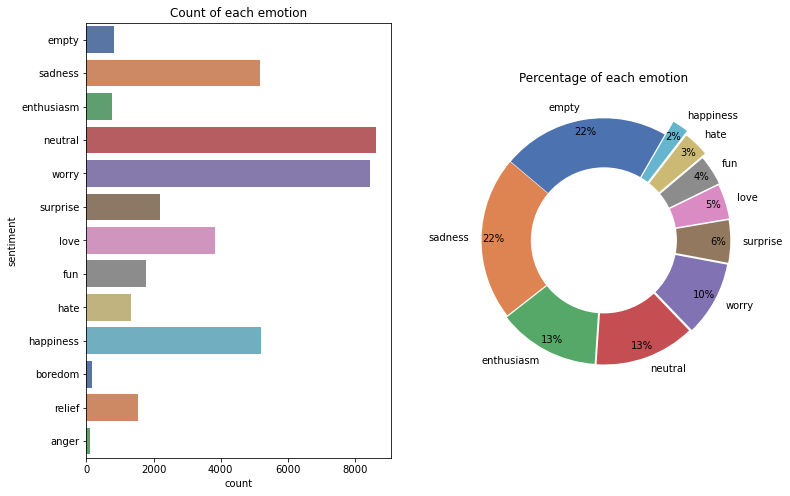

In [31]:
col = 'sentiment'
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

# Simplified explode (optional, can adjust values or remove)
explode = [0.16] * 13

# Ensure labels and sizes match
labels = df[col].value_counts().index[:13]
sizes = df[col].value_counts().values[:13]

unique_sentiments = df[col].nunique()
palette = sns.color_palette("deep", unique_sentiments)

ax2.pie(sizes, explode=explode, startangle=10, labels=labels, autopct='%1.0f%%', pctdistance=0.9, colors=palette)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y=col, data=df, ax=ax1, palette=palette)
ax1.set_title("Count of each sentiment")
ax2.set_title("Percentage of each sentiment")
plt.show()

### **2.4 Analyzing Stopword Frequency in the Dataset**

Text(0, 0.5, 'Frequency')

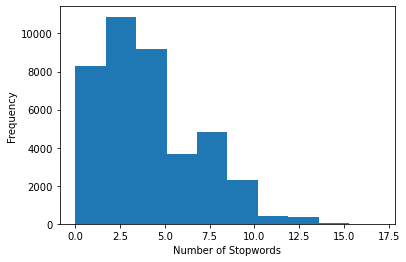

In [32]:
#Count the number of stopwords in the data
temp =df.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['content'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

#distribution of stopwords visually
ax = temp['stop_words'].plot(kind='hist')
ax.set_xlabel('Number of Stopwords')
ax.set_ylabel('Frequency')

### **2.5 Overall Distribution of Character and Token Lengths**

In [33]:
df['char_length'] = df['content'].apply(lambda x : len(x))
df['token_length'] = df['content'].apply(lambda x : len(x.split(" ")))

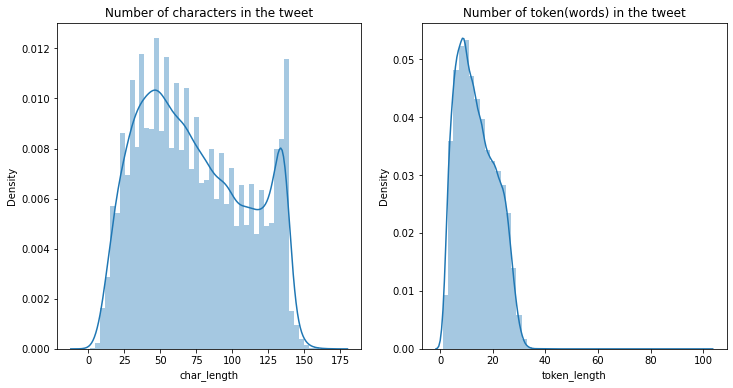

In [34]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(df['char_length'], ax=ax1)
sns.distplot(df['token_length'], ax=ax2)
ax1.set_title('Number of characters in the tweet')
ax2.set_title('Number of token(words) in the tweet')
plt.show()

### **2.6 Character Length Distribution by Sentiment [Top 5 Sentiments]**

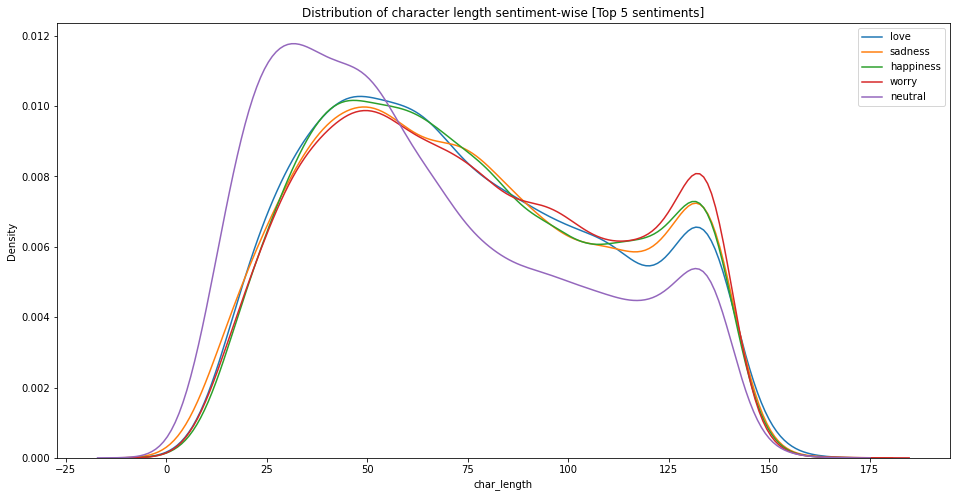

In [35]:
fig, ax = plt.subplots(figsize=(16,8))
for sentiment in df['sentiment'].value_counts().sort_values()[-5:].index.tolist():
    #print(sentiment)
    sns.kdeplot(df[df['sentiment']==sentiment]['char_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of character length sentiment-wise [Top 5 sentiments]")
plt.show()

### **2.7 Distribution of Token Length by Sentiment [Top 5 Sentiments]**

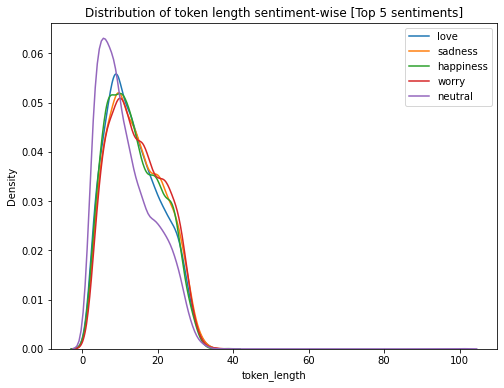

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
for sentiment in df['sentiment'].value_counts().sort_values()[-5:].index.tolist():
    #print(sentiment)
    sns.kdeplot(df[df['sentiment']==sentiment]['token_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of token length sentiment-wise [Top 5 sentiments]")
plt.show()

### **2.8 Exploring the Most Frequent Character and Token Lengths**

In [37]:
avg_df = df.groupby('sentiment').agg({'char_length':'mean', 'token_length':'mean'})

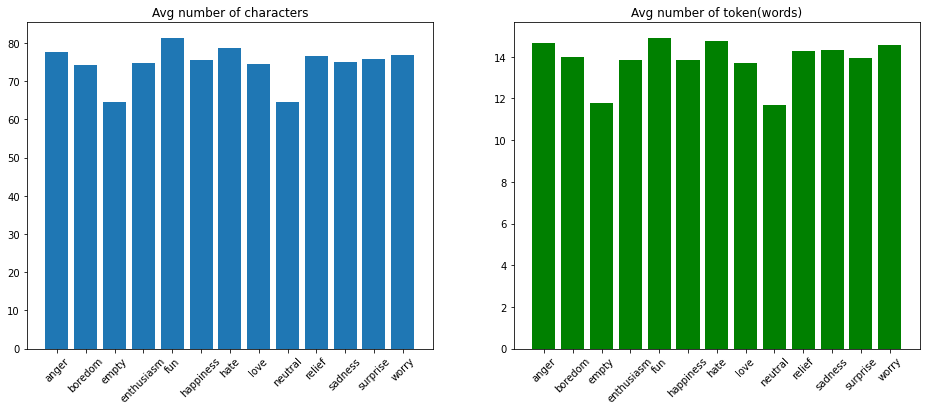

In [38]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.bar(avg_df.index, avg_df['char_length'])
ax2.bar(avg_df.index, avg_df['token_length'], color='green')
ax1.set_title('Avg number of characters')
ax2.set_title('Avg number of token(words)')
ax1.set_xticklabels(avg_df.index, rotation = 45)
ax2.set_xticklabels(avg_df.index, rotation = 45)
plt.show()

**Findings**

- The dataset encompasses 13 distinct emotions;
- "Neutral" and "Worry" emerge as the predominant emotions;
- The character count in most tweets averages about 45;
- The token length commonly peaks at approximately 10;
- Individuals expressing "empty" and "neutral" emotions tend to compose shorter tweets.

## **3. Text Preprocessing**

### **3.1 Management and Removal of Duplicates with Divergent Emotions in Texts**

In [51]:
# Grouping by 'content' and listing the unique emotions for each group
grouped_emotions = df.groupby('content')['sentiment'].unique()

# Filtering out groups with more than one unique emotion
duplicates_with_different_emotions = grouped_emotions[grouped_emotions.apply(lambda x: len(x) > 1)]

# Converting arrays of emotions into strings
duplicates_with_different_emotions_str = duplicates_with_different_emotions.apply(lambda x: ', '.join(x))

# For display using tabulate
duplicates_list = duplicates_with_different_emotions_str.reset_index().values.tolist()

# Displaying the result
print(len(duplicates_with_different_emotions))
print(tabulate(duplicates_list, headers=['Content', 'Different Emotions'], tablefmt='fancy_grid'))

62
╒══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════════════════════════════════════════════════════╕
│ Content                                                                                                                                  │ Different Emotions                                       │
╞══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪══════════════════════════════════════════════════════════╡
│ 0                                                                                                                                        │ empty, neutral                                           │
├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────

In [52]:
#print the rows which are duplicated (duplicated in the text but with different emotions)
df[df['content'].duplicated() == True]

,tweet_id,sentiment,content
366,1957048870,worry,I feel so deflated. No more doggy.
521,1957088574,worry,Somebody please save the polar bears!
1026,1957198430,neutral,I'm at work
3684,1958103183,sadness,@dublins98dave me too! I am down 400 euro
4363,1960336689,worry,"is upset, I left my phone at home again"
...,...,...,...
39859,1753886681,love,Happy Mothers Day
39898,1753902524,love,happy mothers day!
39913,1753902827,happiness,happy mother's day!
39915,1753903008,love,happy mother's day everyone


In [53]:
df[df['content'] == df.iloc[366]['content']]

,tweet_id,sentiment,content
324,1957039922,sadness,I feel so deflated. No more doggy.
366,1957048870,worry,I feel so deflated. No more doggy.


In [54]:
#removing duplicated text 
index = df[df['content'].duplicated() == True].index
df.drop(index, axis = 0, inplace = True)
df.reset_index(inplace=True, drop = True)

### Train test split

In [55]:
df_train,df_test = train_test_split(df, test_size=0.2,random_state = 123)

### Data Balancing

In [ ]:
target_class = 'neutral'

# Filter out the target class
df_target_class = df_train[df_train['sentiment'] == target_class]

# Randomly sample 5000 images from the target class
df_target_class_downsampled = df_target_class.sample(n=5300, random_state=42)

# Remove the original target class data from the dataframe
df_train = df_train[df_train['sentiment'] != target_class]

# Append the downsampled data
df_train = df_train.append(df_target_class_downsampled, ignore_index=True)

In [ ]:
target_class = 'worry'

# Filter out the target class
df_target_class = df_train[df_train['sentiment'] == target_class]

# Randomly sample 5000 images from the target class
df_target_class_downsampled = df_target_class.sample(n=5300, random_state=42)

# Remove the original target class data from the dataframe
df_train = df_train[df_train['sentiment'] != target_class]

# Append the downsampled data
df_train = df_train.append(df_target_class_downsampled, ignore_index=True)

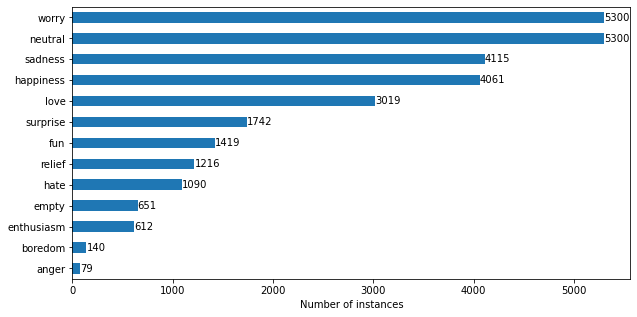

In [46]:
ax = df_train.sentiment.value_counts().sort_values(ascending=True).plot.barh(figsize=(10,5))
ax.bar_label(ax.containers[0])
ax.set_xlabel('Number of instances')
plt.show()

In [47]:
def synonym_replacement(sentence, n=2):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word.isalpha()]))
    random.shuffle(random_word_list)
    num_replaced = 0

    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)

        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        
        if num_replaced >= n:  # Only replace up to n words
            break

    sentence = ' '.join(new_words)
    return sentence

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char.isalpha()])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

n_augmentations = 5300  # Total number of new sentences to generate for each target class

for label in df_train['sentiment'].unique():
    if label not in ['worry', 'neutral']:
        target_class = label
        print('label: ' + label + '\n')
        
        # Filter samples from this class
        class_samples = df_train[df_train['sentiment'] == label]

        # Calculate how many samples to generate
        samples_to_generate = n_augmentations - class_samples.shape[0]
        
        generated_count = 0
        while generated_count < samples_to_generate:
            row = class_samples.sample(n=1).iloc[0]  # Randomly select a row to augment
            new_sentence = synonym_replacement(row['content'])
            df_train = df_train.append({'content': new_sentence, 'sentiment': target_class}, ignore_index=True)
            generated_count += 1

df_train.to_csv('augdf.csv', index=False)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jorgevieira/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jorgevieira/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jorgevieira/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


label: surprise

label: sadness

label: anger

label: fun

label: happiness

label: empty

label: hate

label: love

label: enthusiasm

label: relief

label: boredom



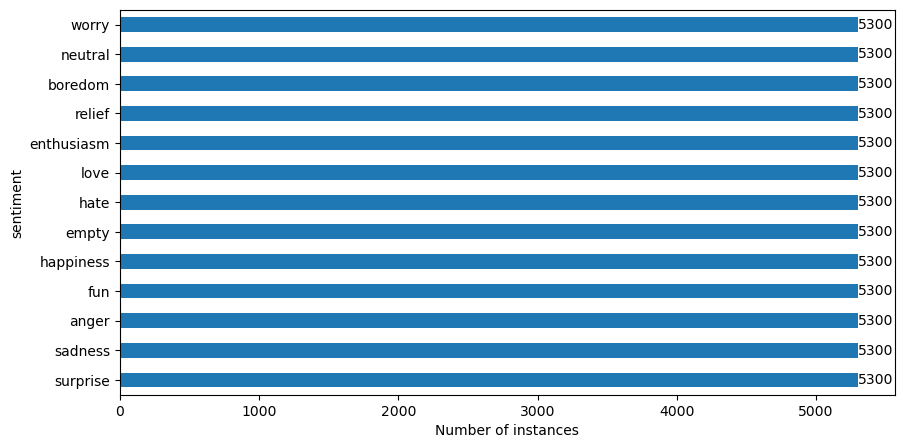

In [3]:
df = pd.read_csv('augdf.csv', delimiter=',')
df.head()

ax = df.sentiment.value_counts().sort_values(ascending=True).plot.barh(figsize=(10,5))
ax.bar_label(ax.containers[0])
ax.set_xlabel('Number of instances')
plt.show()

### **3.2 Data preparation and text-preprocessing**

In [4]:
def text_preprocessing_platform(df, text_col, remove_stopwords=True):
    
    ## Define functions for individual steps
    # First function is used to denoise text
    def denoise_text(text):
        # Strip html if any. For ex. removing <html>, <p> tags
        soup = BeautifulSoup(text, "html.parser")
        text = soup.get_text()
        # Replace contractions in the text. For ex. didn't -> did not
        text = contractions.fix(text)
        return text
    
    ## Next step is text-normalization
    
    # Text normalization includes many steps.
    
    # Each function below serves a step.
    
    
    def remove_non_ascii(words):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words
    
    
    def to_lowercase(words):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words
    
    
    def remove_punctuation(words):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words
    
    
    def replace_numbers(words):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words
    
    
    def remove_stopwords(words):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in words:
            if word not in stopwords.words('english'):
                new_words.append(word)
        return new_words
    
    
    def stem_words(words):
        """Stem words in list of tokenized words"""
        stemmer = LancasterStemmer()
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems
    
    
    def lemmatize_verbs(words):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas
    
    
    ### A wrap-up function for normalization
    def normalize_text(words, remove_stopwords):
        words = remove_non_ascii(words)
        words = to_lowercase(words)
        words = remove_punctuation(words)
        words = replace_numbers(words)
        if remove_stopwords:
            words = remove_stopwords(words)
        #words = stem_words(words)
        words = lemmatize_verbs(words)
        return words
    
    # All above functions work on word tokens we need a tokenizer
    
    # Tokenize tweet into words
    def tokenize(text):
        return nltk.word_tokenize(text)
    
    
    # A overall wrap-up function
    def text_prepare(text):
        text = denoise_text(text)
        text = ' '.join([x for x in normalize_text(tokenize(text), remove_stopwords)])
        return text
    
    # run every-step
    df[text_col] = [text_prepare(x) for x in df[text_col]]
    
    
    # return processed df
    return df

In [5]:
print("Before Text Preprocessing")
display(df.head()[['content']])
processed_df = text_preprocessing_platform(df, 'content', remove_stopwords=False)
print("After Text Preprocessing")
display(processed_df.head()[['content']])

Before Text Preprocessing


,content
0,@tiffanylue i know i was listenin to bad habi...
1,Layin n bed with a headache ughhhh...waitin o...
2,Funeral ceremony...gloomy friday...
3,wants to hang out with friends SOON!
4,@dannycastillo We want to trade with someone w...


After Text Preprocessing


,content
0,tiffanylue know listenin bad habit earlier sta...
1,layin n bed headache ughhhh waitin call
2,funeral ceremony gloomy friday
3,want hang friends soon
4,dannycastillo want trade someone houston ticke...


### **3.3 Uni-gram Analysis**

In [66]:
def print_word_cloud(df, sentiment):

    print("Word cloud of most frequent words for the sentiment : {}".format(sentiment))

    temp_df = df[df['sentiment']==sentiment]
    print("Number of Rows : ", len(temp_df))

    corpus = ''
    for text in temp_df.content:
        text = str(text)
        corpus += text
        
    total = 0
    count = defaultdict(lambda: 0)
    for word in corpus.split(" "):
        total += 1
        count[word] += 1
        
    top20pairs = sorted(count.items(), key=lambda kv: kv[1], reverse=True)[:20]
    top20words = [i[0] for i in top20pairs]
    top20freq = [i[1] for i in top20pairs]
    
    xs = np.arange(len(top20words))
    width = 0.5

    fig = plt.figure(figsize=(10,6))                                                               
    ax = fig.gca()  #get current axes
    ax.bar(xs, top20freq, width, align='center')

    ax.set_xticks(xs)
    ax.set_xticklabels(top20words)
    plt.xticks(rotation=45)
    
    
    stopwords = set(STOPWORDS)
    # lower max_font_size, change the maximum number of word and lighten the background:
    wordcloud = WordCloud(max_font_size=50, max_words=50,stopwords=stopwords, background_color="white").generate(corpus)
    plt.figure(figsize = (12, 12), facecolor = None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Word cloud of most frequent words for the sentiment : sadness
Number of Rows :  5300


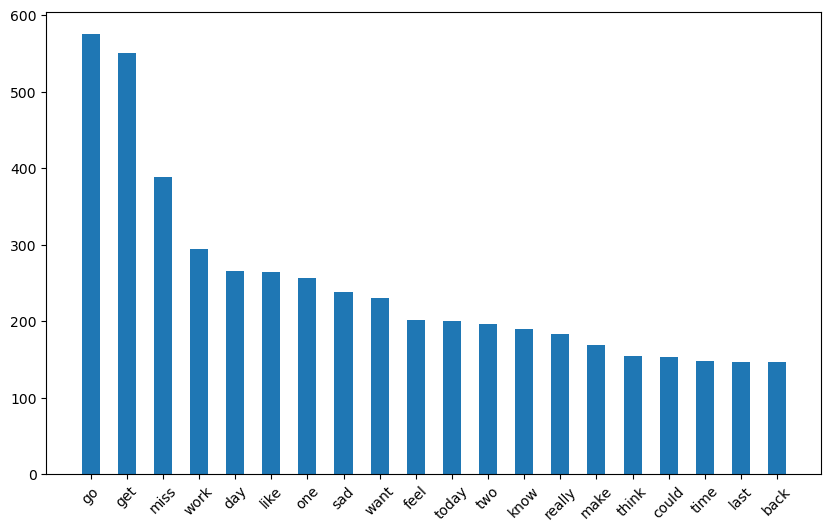

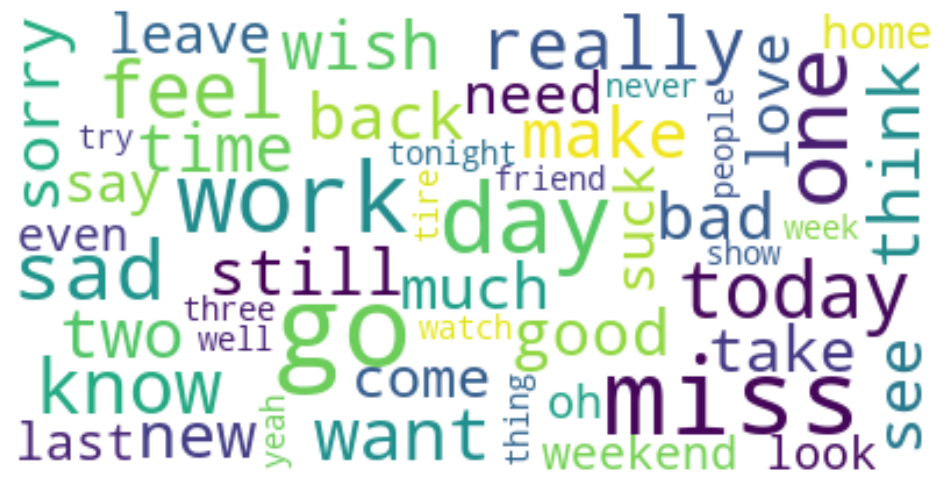

In [67]:
print_word_cloud(df, 'sadness')

Word cloud of most frequent words for the sentiment : happiness
Number of Rows :  5209


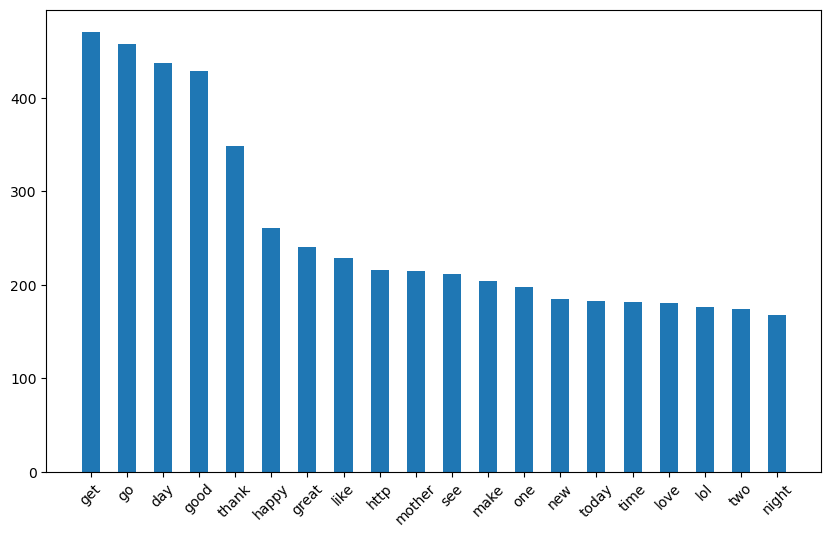

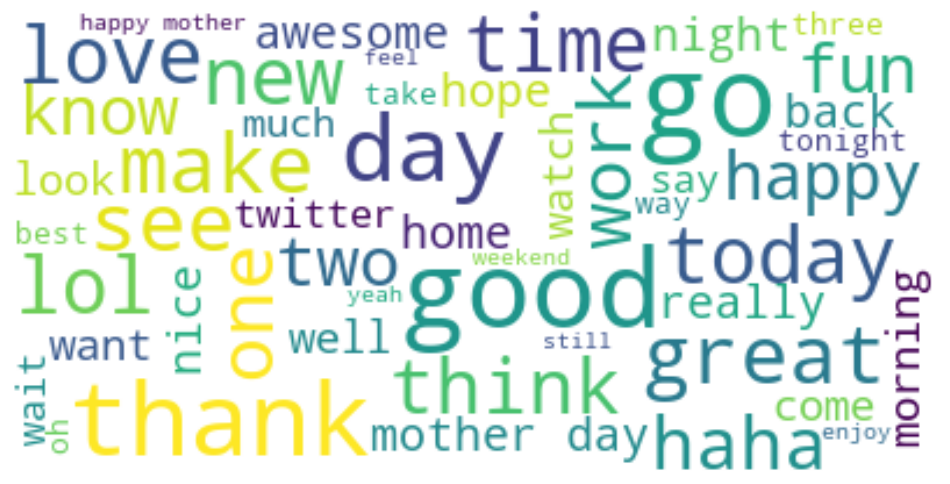

In [ ]:
print_word_cloud(df, 'happiness')

Word cloud of most frequent words for the sentiment : worry
Number of Rows :  8459


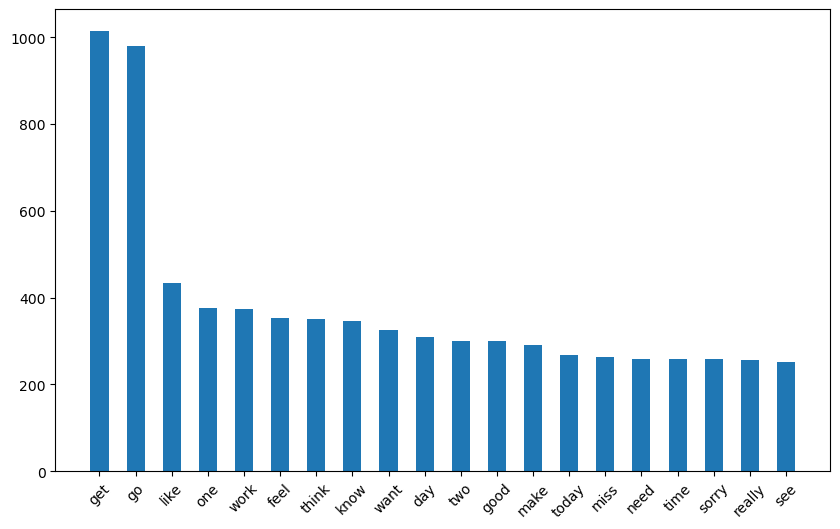

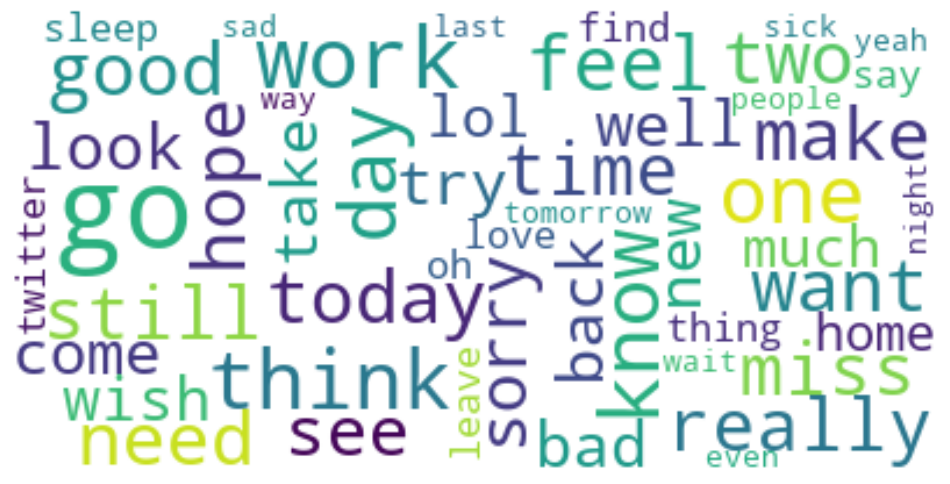

In [ ]:
print_word_cloud(df, 'worry')

Word cloud of most frequent words for the sentiment : neutral
Number of Rows :  8638


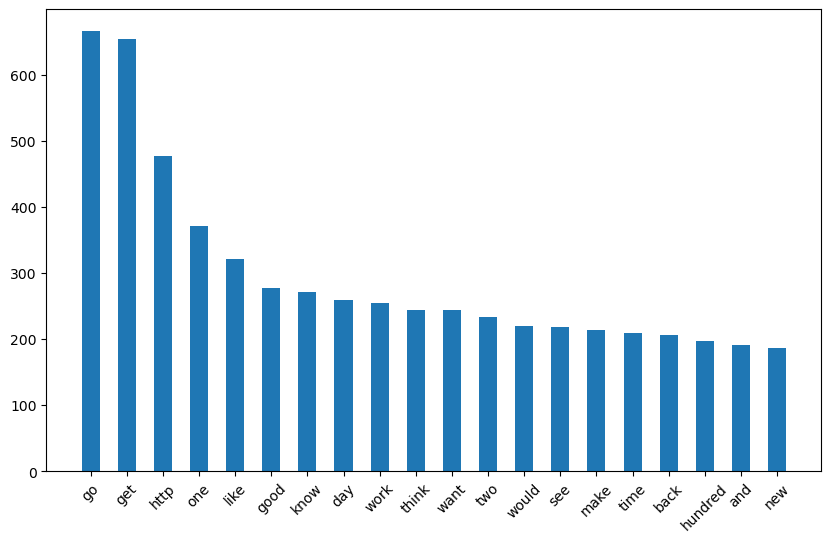

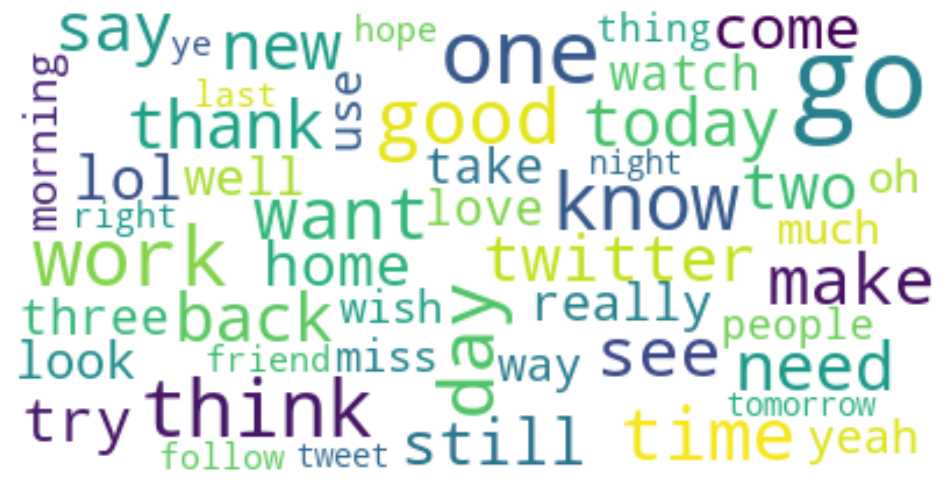

In [ ]:
print_word_cloud(df, 'neutral')

Word cloud of most frequent words for the sentiment : other
Number of Rows :  8687


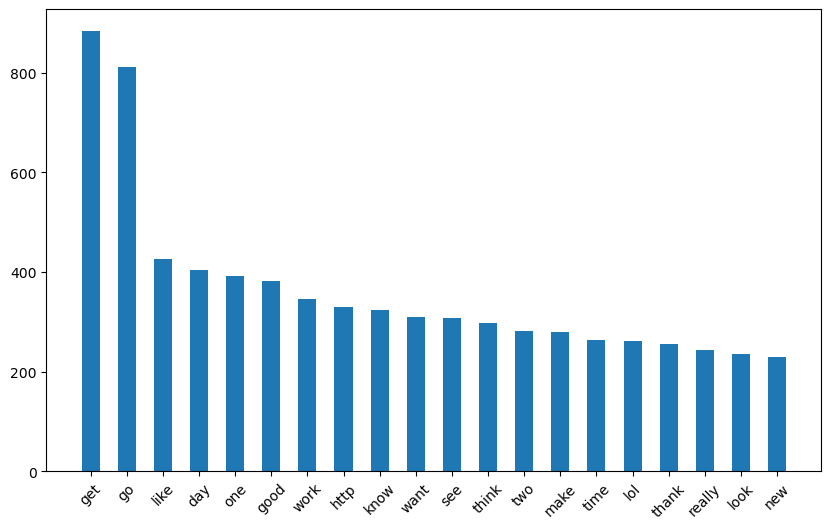

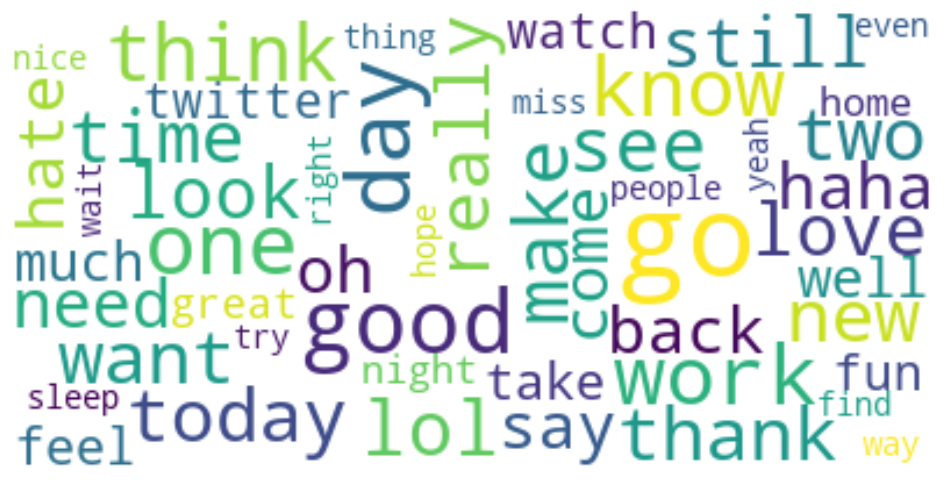

In [ ]:
print_word_cloud(df, 'other')

### **3.5 Text Cleaning and Normalization**

In [7]:
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]
    
    return " " .join(text)

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):
    
    text = text.split()

    text=[y.lower() for y in text]
    
    return " " .join(text)

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan
            
def normalize_text(df):
    df.content=df.content.apply(lambda text : lower_case(text))
    df.content=df.content.apply(lambda text : remove_stop_words(text))
    df.content=df.content.apply(lambda text : Removing_numbers(text))
    df.content=df.content.apply(lambda text : Removing_punctuations(text))
    df.content=df.content.apply(lambda text : Removing_urls(text))
    df.content=df.content.apply(lambda text : lemmatization(text))
    return df

def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence

## **4. Exploring Advanced Neural Network Architectures**

## **4.1 Recurrent Architectures: Beyond the Basics**

### **4.1.1 Long Short-Term Memory (LSTM)**

In [69]:
# Devide the df into train, test and validation sets

X = df['content']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123, stratify=y_train)

print("Train set size : ", X_train.shape)
print("Validation set size : ", X_val.shape)
print("Test set size : ", X_test.shape)

# Rebuilding the DataFrames
df_train = pd.DataFrame({'content': X_train, 'sentiment': y_train})
df_test = pd.DataFrame({'content': X_val, 'sentiment': y_val})
df_val = pd.DataFrame({'content': X_test, 'sentiment': y_test})

df_train.rename(columns={'content': 'text', 'sentiment': 'label'}, inplace=True)
df_test.rename(columns={'content': 'text', 'sentiment': 'label'}, inplace=True)

label_encoder = LabelEncoder()
df_train['label'] = label_encoder.fit_transform(df_train['label'])
df_test['label'] = label_encoder.transform(df_test['label'])

df_train_dict = {
    "text": df_train['text'].tolist(),
    "label": df_train['label'].tolist()
}

df_test_dict = {
    "text": df_test['text'].tolist(),
    "label": df_test['label'].tolist()
}

train_data = Dataset.from_dict(df_train_dict)
test_data = Dataset.from_dict(df_test_dict) 

In [16]:
tokenizer = torchtext.data.utils.get_tokenizer('basic_english')

def tokenize_data(example, tokenizer, max_length):
    tokens = tokenizer(example['text'])[:max_length]
    length = len(tokens)
    return {'tokens': tokens, 'length': length}

In [18]:
max_length = 256

train_data = train_data.map(tokenize_data, fn_kwargs={'tokenizer': tokenizer, 'max_length': max_length})
test_data = test_data.map(tokenize_data, fn_kwargs={'tokenizer': tokenizer, 'max_length': max_length})

Map: 100%|██████████| 11024/11024 [00:01<00:00, 8018.23 examples/s]


In [19]:
test_size = 0.25

train_valid_data = train_data.train_test_split(test_size=test_size)
train_data = train_valid_data['train']
valid_data = train_valid_data['test']

In [21]:
min_freq = 5
special_tokens = ['<unk>', '<pad>']

vocab = torchtext.vocab.build_vocab_from_iterator(train_data['tokens'],
                                                  min_freq=min_freq,
                                                  specials=special_tokens)

unk_index = vocab['<unk>']
pad_index = vocab['<pad>']

vocab.set_default_index(unk_index)

In [24]:
def numericalize_data(example, vocab):
    ids = [vocab[token] for token in example['tokens']]
    return {'ids': ids}

train_data = train_data.map(numericalize_data, fn_kwargs={'vocab': vocab})
valid_data = valid_data.map(numericalize_data, fn_kwargs={'vocab': vocab})
test_data = test_data.map(numericalize_data, fn_kwargs={'vocab': vocab})

In [26]:
train_data = train_data.with_format(type='torch', columns=['ids', 'label', 'length'])
valid_data = valid_data.with_format(type='torch', columns=['ids', 'label', 'length'])
test_data = test_data.with_format(type='torch', columns=['ids', 'label', 'length'])

train_data[0]

In [28]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional,
                 dropout_rate, pad_index):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_index)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, bidirectional=bidirectional,
                            dropout=dropout_rate, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout_rate)
        
    def forward(self, ids, length):
        # ids = [batch size, seq len]
        # length = [batch size]
        embedded = self.dropout(self.embedding(ids))
        # embedded = [batch size, seq len, embedding dim]
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, length, batch_first=True, 
                                                            enforce_sorted=False)
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        # hidden = [n layers * n directions, batch size, hidden dim]
        # cell = [n layers * n directions, batch size, hidden dim]
        output, output_length = nn.utils.rnn.pad_packed_sequence(packed_output)
        # output = [batch size, seq len, hidden dim * n directions]
        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat([hidden[-1], hidden[-2]], dim=-1))
            # hidden = [batch size, hidden dim * 2]
        else:
            hidden = self.dropout(hidden[-1])
            # hidden = [batch size, hidden dim]
        prediction = self.fc(hidden)
        # prediction = [batch size, output dim]
        return prediction

In [29]:
vocab_size = len(vocab)
embedding_dim = 300
hidden_dim = 300
output_dim = len(train_data.unique('label'))
n_layers = 2
bidirectional = True
dropout_rate = 0.5

model = LSTM(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout_rate, 
             pad_index)

In [30]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 5,056,213 trainable parameters


In [31]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)
        nn.init.zeros_(m.bias)
    elif isinstance(m, nn.LSTM):
        for name, param in m.named_parameters():
            if 'bias' in name:
                nn.init.zeros_(param)
            elif 'weight' in name:
                nn.init.orthogonal_(param)

print(f'The model has {count_parameters(model):,} trainable parameters')

In [32]:
model.apply(initialize_weights)

LSTM(
  (embedding): Embedding(4796, 300, padding_idx=1)
  (lstm): LSTM(300, 300, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=600, out_features=13, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [34]:
vectors = torchtext.vocab.FastText()

pretrained_embedding = vectors.get_vecs_by_tokens(vocab.get_itos())

model.embedding.weight.data = pretrained_embedding

lr = 5e-4

optimizer = optim.Adam(model.parameters(), lr=lr)

criterion = nn.CrossEntropyLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)
criterion = criterion.to(device)

In [35]:
def collate(batch, pad_index):
    batch_ids = [i['ids'] for i in batch]
    batch_ids = nn.utils.rnn.pad_sequence(batch_ids, padding_value=pad_index, batch_first=True)
    batch_length = [i['length'] for i in batch]
    batch_length = torch.stack(batch_length)
    batch_label = [i['label'] for i in batch]
    batch_label = torch.stack(batch_label)
    batch = {'ids': batch_ids,
             'length': batch_length,
             'label': batch_label}
    return batch

batch_size = 512

collate = functools.partial(collate, pad_index=pad_index)

train_dataloader = torch.utils.data.DataLoader(train_data, 
                                               batch_size=batch_size, 
                                               collate_fn=collate, 
                                               shuffle=True)

valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, collate_fn=collate)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, collate_fn=collate)

In [43]:
def train(dataloader, model, criterion, optimizer, device):
    model.train()
    epoch_losses = []
    epoch_accs = []

    for batch in tqdm(dataloader, desc='training...', file=sys.stdout):
        ids = batch['ids'].to(device)
        length = batch['length']
        label = batch['label'].to(device)

        # Adicionando verificação de comprimento
        if any(l <= 0 for l in length):
            continue  # Ignora este lote se houver sequências com comprimento zero

        prediction = model(ids, length)
        loss = criterion(prediction, label)
        accuracy = get_accuracy(prediction, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        epoch_accs.append(accuracy)

    return epoch_losses, epoch_accs

def evaluate(dataloader, model, criterion, device):
    model.eval()
    epoch_losses = []
    epoch_accs = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc='evaluating...', file=sys.stdout):
            ids = batch['ids'].to(device)
            length = batch['length']
            label = batch['label'].to(device)

            # Adicionando verificação de comprimento
            if any(l <= 0 for l in length):
                continue  # Ignora este lote se houver sequências com comprimento zero

            prediction = model(ids, length)
            loss = criterion(prediction, label)
            accuracy = get_accuracy(prediction, label)
            epoch_losses.append(loss.item())
            epoch_accs.append(accuracy)

    return epoch_losses, epoch_accs

def get_accuracy(prediction, label):
    # Convertendo as previsões em classes (pode ser diferente dependendo do seu modelo)
    predicted_classes = prediction.argmax(dim=1)

    # Calculando o número de previsões corretas
    correct_predictions = (predicted_classes == label).sum().item()

    # Calculando a acurácia
    accuracy = correct_predictions / len(label)
    return accuracy

In [47]:
n_epochs = 50
best_valid_loss = float('inf')

train_losses = []
train_accs = []
valid_losses = []
valid_accs = []

for epoch in range(n_epochs):

    train_loss, train_acc = train(train_dataloader, model, criterion, optimizer, device)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion, device)

    train_losses.extend(train_loss)
    train_accs.extend(train_acc)
    valid_losses.extend(valid_loss)
    valid_accs.extend(valid_acc)
    
    epoch_train_loss = np.mean(train_loss)
    epoch_train_acc = np.mean(train_acc)
    epoch_valid_loss = np.mean(valid_loss)
    epoch_valid_acc = np.mean(valid_acc)
    
    if epoch_valid_loss < best_valid_loss:
        best_valid_loss = epoch_valid_loss
        torch.save(model.state_dict(), 'lstm.pt')
    
    print(f'epoch: {epoch+1}')
    print(f'train_loss: {epoch_train_loss:.3f}, train_acc: {epoch_train_acc:.3f}')
    print(f'valid_loss: {epoch_valid_loss:.3f}, valid_acc: {epoch_valid_acc:.3f}')

training...:   0%|          | 0/49 [00:00<?, ?it/s]

evaluating...: 100%|██████████| 17/17 [00:12<00:00,  1.34it/s]
epoch: 1
train_loss: 1.709, train_acc: 0.423
valid_loss: 1.674, valid_acc: 0.428
evaluating...: 100%|██████████| 17/17 [00:11<00:00,  1.47it/s]
epoch: 2
train_loss: 1.639, train_acc: 0.444
valid_loss: 1.635, valid_acc: 0.449
evaluating...: 100%|██████████| 17/17 [00:12<00:00,  1.36it/s]
epoch: 3
train_loss: 1.584, train_acc: 0.467
valid_loss: 1.618, valid_acc: 0.446
evaluating...: 100%|██████████| 17/17 [00:11<00:00,  1.45it/s]
epoch: 4
train_loss: 1.541, train_acc: 0.481
valid_loss: 1.574, valid_acc: 0.468
evaluating...: 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]
epoch: 5
train_loss: 1.481, train_acc: 0.499
valid_loss: 1.554, valid_acc: 0.477
evaluating...: 100%|██████████| 17/17 [00:11<00:00,  1.50it/s]
epoch: 6
train_loss: 1.446, train_acc: 0.513
valid_loss: 1.530, valid_acc: 0.477
evaluating...: 100%|██████████| 17/17 [00:12<00:00,  1.38it/s]
epoch: 7
train_loss: 1.397, train_acc: 0.531
valid_loss: 1.507, valid_acc

Text(0, 0.5, 'Loss')

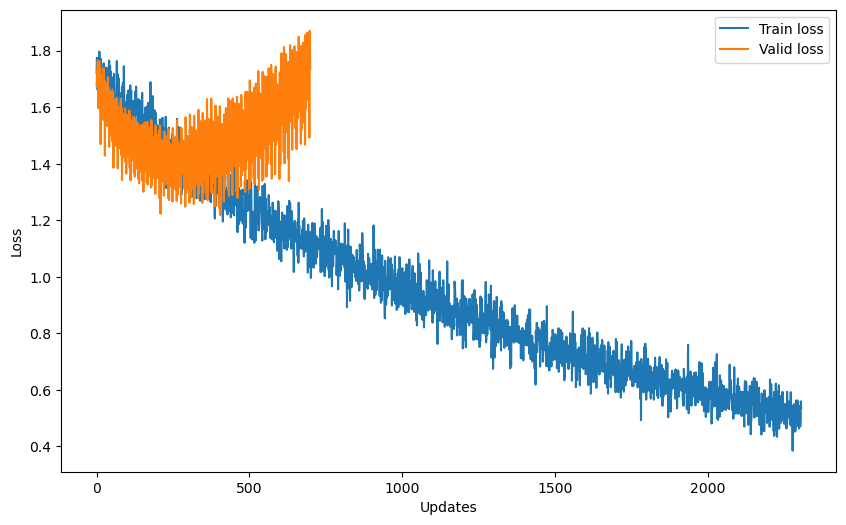

In [48]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(train_losses, label='Train loss')
ax.plot(valid_losses, label='Valid loss')
plt.legend()
ax.set_xlabel('Updates')
ax.set_ylabel('Loss')

Text(0, 0.5, 'Accuracy')

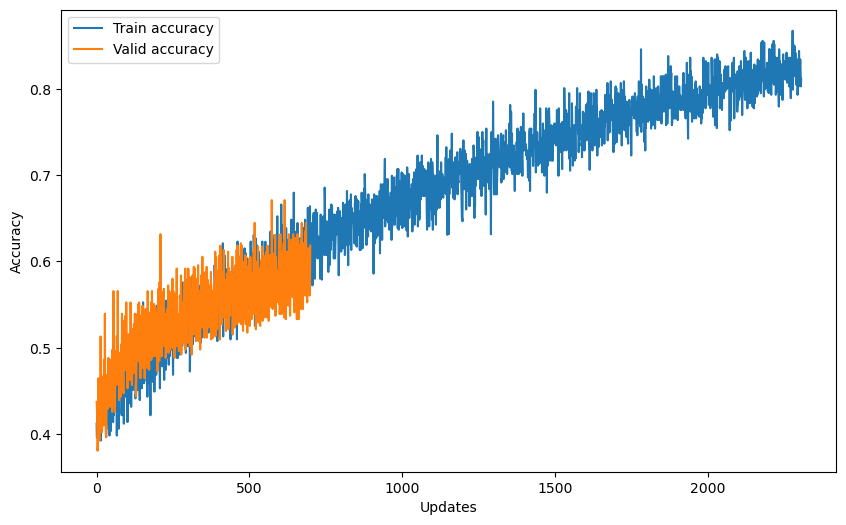

In [49]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(train_accs, label='Train accuracy')
ax.plot(valid_accs, label='Valid accuracy')
plt.legend()
ax.set_xlabel('Updates')
ax.set_ylabel('Accuracy')

In [50]:
model.load_state_dict(torch.load('lstm.pt'))

test_loss, test_acc = evaluate(test_dataloader, model, criterion, device)

epoch_test_loss = np.mean(test_loss)
epoch_test_acc = np.mean(test_acc)

print(f'test_loss: {epoch_test_loss:.3f}, test_acc: {epoch_test_acc:.3f}')

evaluating...: 100%|██████████| 22/22 [00:08<00:00,  2.51it/s]
test_loss: 1.420, test_acc: 0.550


In [56]:
def predict_sentiment(text, model, tokenizer, vocab, device):
    tokens = tokenizer(text)
    ids = [vocab[t] for t in tokens]
    length = torch.LongTensor([len(ids)])
    tensor = torch.LongTensor(ids).unsqueeze(dim=0).to(device)
    prediction = model(tensor, length).squeeze(dim=0)
    probability = torch.softmax(prediction, dim=-1)
    predicted_class = prediction.argmax(dim=-1).item()
    predicted_probability = probability[predicted_class].item()
    return predicted_class, predicted_probability

In [57]:
text = "This film is terrible!"

predict_sentiment(text, model, tokenizer, vocab, device)

(6, 0.8291159272193909)

In [58]:
text = "This film is great!"

predict_sentiment(text, model, tokenizer, vocab, device)

(5, 0.5099617838859558)

In [59]:
text = "This film is not terrible, it's great!"

predict_sentiment(text, model, tokenizer, vocab, device)

(6, 0.42236563563346863)

In [60]:
text = "This film is not great, it's terrible!"

predict_sentiment(text, model, tokenizer, vocab, device)

(6, 0.22004149854183197)

## **4.2 Transformers: Revolutionizing Natural Language Processing with and without Attention Mechanisms**

Transformers with and without Attention

In [10]:
def tokenize_and_numericalize_data(example, tokenizer):
    ids = tokenizer(example['text'], truncation=True)['input_ids']
    return {'ids': ids}

transformer_name = 'bert-base-uncased'

transformer = AutoModel.from_pretrained(transformer_name)

transformer.config.hidden_size

tokenizer = AutoTokenizer.from_pretrained(transformer_name)

In [11]:
# Devide the df into train, test and validation sets

X = df['content']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123, stratify=y_train)

print("Train set size : ", X_train.shape)
print("Test set size : ", X_test.shape)
print("Validation set size : ", X_val.shape)

# Rebuilding the DataFrames
df_train = pd.DataFrame({'content': X_train, 'sentiment': y_train})
df_test = pd.DataFrame({'content': X_val, 'sentiment': y_val})
df_val = pd.DataFrame({'content': X_test, 'sentiment': y_test})


df_train.rename(columns={'content': 'text', 'sentiment': 'label'}, inplace=True)
df_test.rename(columns={'content': 'text', 'sentiment': 'label'}, inplace=True)
df_val.rename(columns={'content': 'text', 'sentiment': 'label'}, inplace=True)

label_encoder = LabelEncoder()
df_train['label'] = label_encoder.fit_transform(df_train['label'])
df_test['label'] = label_encoder.transform(df_test['label'])
df_val['label'] = label_encoder.transform(df_val['label'])


df_train_dict = {
    "text": df_train['text'].tolist(),
    "label": df_train['label'].tolist()
}

df_test_dict = {
    "text": df_test['text'].tolist(),
    "label": df_test['label'].tolist()
}

df_val_dict = {
    "text": df_val['text'].tolist(),
    "label": df_val['label'].tolist()
}

train_data = Dataset.from_dict(df_train_dict)
test_data = Dataset.from_dict(df_test_dict)
valid_data = Dataset.from_dict(df_val_dict)

Train set size :  (25600,)
Test set size :  (8000,)
Validation set size :  (6400,)


In [12]:
df_train['ids'] = df_train['text'].apply(lambda x: tokenizer(x)['input_ids'])
df_test['ids'] = df_test['text'].apply(lambda x: tokenizer(x)['input_ids'])
df_val['ids'] = df_val['text'].apply(lambda x: tokenizer(x)['input_ids'])

train_data = train_data.map(tokenize_and_numericalize_data, fn_kwargs={'tokenizer': tokenizer})
test_data = test_data.map(tokenize_and_numericalize_data, fn_kwargs={'tokenizer': tokenizer})
valid_data = valid_data.map(tokenize_and_numericalize_data, fn_kwargs={'tokenizer': tokenizer})


train_data = train_data.with_format(type='torch', columns=['ids', 'label'])
valid_data = valid_data.with_format(type='torch', columns=['ids', 'label'])
test_data = test_data.with_format(type='torch', columns=['ids', 'label'])

Map: 100%|██████████| 8000/8000 [00:01<00:00, 7204.05 examples/s]


In [13]:
class Transformer(nn.Module):
    def __init__(self, transformer, output_dim, freeze):
        super().__init__()
        self.transformer = transformer
        hidden_dim = transformer.config.hidden_size
        self.fc = nn.Linear(hidden_dim, output_dim)
        
        if freeze:
            for param in self.transformer.parameters():
                param.requires_grad = False
        
    def forward(self, ids):
        # ids = [batch size, seq len]
        output = self.transformer(ids, output_attentions=True)
        hidden = output.last_hidden_state
        # hidden = [batch size, seq len, hidden dim]
        attention = output.attentions[-1]
        # attention = [batch size, n heads, seq len, seq len]
        cls_hidden = hidden[:,0,:]
        prediction = self.fc(torch.tanh(cls_hidden))
        # prediction = [batch size, output dim]
        return prediction

In [14]:
output_dim = len(train_data['label'].unique())
freeze = False

model = Transformer(transformer, output_dim, freeze)

In [15]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 109,492,237 trainable parameters


In [16]:
lr = 1e-5

optimizer = optim.Adam(model.parameters(), lr=lr)

criterion = nn.CrossEntropyLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)
criterion = criterion.to(device)

In [17]:
def collate(batch, pad_index):
    batch_ids = [i['ids'] for i in batch]
    batch_ids = nn.utils.rnn.pad_sequence(batch_ids, padding_value=pad_index, batch_first=True)
    batch_label = [i['label'] for i in batch]
    batch_label = torch.stack(batch_label)
    batch = {'ids': batch_ids,
             'label': batch_label}
    return batch

In [19]:
pad_index = tokenizer.pad_token_id 

batch_size = 8

collate = functools.partial(collate, pad_index=pad_index)

train_dataloader = torch.utils.data.DataLoader(train_data, 
                                               batch_size=batch_size, 
                                               collate_fn=collate, 
                                               shuffle=True)

valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, collate_fn=collate)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, collate_fn=collate)

In [20]:
def train(dataloader, model, criterion, optimizer, device):

    model.train()
    epoch_losses = []
    epoch_accs = []

    for batch in tqdm(dataloader, desc='training...', file=sys.stdout):
        ids = batch['ids'].to(device)
        label = batch['label'].to(device)
        prediction = model(ids)
        loss = criterion(prediction, label)
        accuracy = get_accuracy(prediction, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        epoch_accs.append(accuracy.item())

    return epoch_losses, epoch_accs

In [21]:
def evaluate(dataloader, model, criterion, device):
    
    model.eval()
    epoch_losses = []
    epoch_accs = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc='evaluating...', file=sys.stdout):
            ids = batch['ids'].to(device)
            label = batch['label'].to(device)
            prediction = model(ids)
            loss = criterion(prediction, label)
            accuracy = get_accuracy(prediction, label)
            epoch_losses.append(loss.item())
            epoch_accs.append(accuracy.item())

    return epoch_losses, epoch_accs

In [22]:
def get_accuracy(prediction, label):
    batch_size, _ = prediction.shape
    predicted_classes = prediction.argmax(dim=-1)
    correct_predictions = predicted_classes.eq(label).sum()
    accuracy = correct_predictions / batch_size
    return accuracy

In [117]:
n_epochs = 3
best_valid_loss = float('inf')

train_losses = []
train_accs = []
valid_losses = []
valid_accs = []

for epoch in range(n_epochs):

    train_loss, train_acc = train(train_dataloader, model, criterion, optimizer, device)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion, device)

    train_losses.extend(train_loss)
    train_accs.extend(train_acc)
    valid_losses.extend(valid_loss)
    valid_accs.extend(valid_acc)
    
    epoch_train_loss = np.mean(train_loss)
    epoch_train_acc = np.mean(train_acc)
    epoch_valid_loss = np.mean(valid_loss)
    epoch_valid_acc = np.mean(valid_acc)
    
    if epoch_valid_loss < best_valid_loss:
        best_valid_loss = epoch_valid_loss
        torch.save(model.state_dict(), 'transformer.pt')
    
    print(f'epoch: {epoch+1}')
    print(f'train_loss: {epoch_train_loss:.3f}, train_acc: {epoch_train_acc:.3f}')
    print(f'valid_loss: {epoch_valid_loss:.3f}, valid_acc: {epoch_valid_acc:.3f}')

training...:   0%|          | 0/5512 [00:00<?, ?it/s]

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


evaluating...: 100%|██████████| 1723/1723 [13:46<00:00,  2.08it/s]
epoch: 1
train_loss: 1.897, train_acc: 0.358
valid_loss: 1.569, valid_acc: 0.473
evaluating...: 100%|██████████| 1723/1723 [09:54<00:00,  2.90it/s]
epoch: 2
train_loss: 1.307, train_acc: 0.564
valid_loss: 1.264, valid_acc: 0.581
evaluating...: 100%|██████████| 1723/1723 [09:59<00:00,  2.88it/s]
epoch: 3
train_loss: 0.890, train_acc: 0.703
valid_loss: 1.080, valid_acc: 0.645


In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(train_losses, label='Train loss')
ax.plot(valid_losses, label='Valid loss')
plt.legend()
ax.set_xlabel('Updates')
ax.set_ylabel('Loss')

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(train_accs, label='Train accuracy')
ax.plot(valid_accs, label='Valid accuracy')
plt.legend()
ax.set_xlabel('Updates')
ax.set_ylabel('Accuracy')

In [ ]:
model.load_state_dict(torch.load('transformer.pt'))

test_loss, test_acc = evaluate(test_dataloader, model, criterion, device)

epoch_test_loss = np.mean(test_loss)
epoch_test_acc = np.mean(test_acc)

print(f'test_loss: {epoch_test_loss:.3f}, test_acc: {epoch_test_acc:.3f}')

In [ ]:
text = "This film is terrible!"

predict_sentiment(text, model, tokenizer, device)

In [ ]:
text = "This film is great!"

predict_sentiment(text, model, tokenizer, device)

In [ ]:
text = "This film is not terrible, it's great!"

predict_sentiment(text, model, tokenizer, device)

## **4.3 Pre-trained Transformers: Maximizing the Potential of Transfer Learning**

BERT with Weighted Classes

In [ ]:
classifier = pipeline('text-classification')

In [ ]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [ ]:
# split train dataset into train, validation and test sets
train_text, temp_text, train_labels, temp_labels = train_test_split(df['content'], df['sentiment'], 
                                                                    random_state=42, 
                                                                    test_size=0.3, 
                                                                    stratify=df['sentiment'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=42, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

In [ ]:
encoder = LabelEncoder()
train_labels = encoder.fit_transform(train_labels)
val_labels = encoder.transform(val_labels)
test_labels = encoder.transform(test_labels)

In [ ]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 30,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 30,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 30,
    pad_to_max_length=True,
    truncation=True
)

In [ ]:
## convert lists to tensors

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [ ]:
#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        
        self.bert = bert 
        
        # dropout layer
        self.dropout = nn.Dropout(0.1)
      
        # relu activation function
        self.relu =  nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768,512)
      
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512,13)

        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):
        
        #pass the inputs to the model  
        _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
      
        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)
      
        # apply softmax activation
        x = self.softmax(x)

        return x

In [ ]:
#import device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

# define the optimizer
optimizer = AdamW(model.parameters(),lr = 1e-5)

In [ ]:
#compute the class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)

print('Class Weights:',class_weights)

In [ ]:
# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 10

In [ ]:
# function to train the model
def train():
    
    model.train()
    total_loss, total_accuracy = 0, 0
    
    # iterate over batches
    progress_bar = tqdm(enumerate(train_dataloader), total=len(train_dataloader), desc="Training")

    for step,batch in progress_bar:
        
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
        #batch = [r for r in batch]
        sent_id, mask, labels = batch
        
        # clear previously calculated gradients 
        model.zero_grad()        

        # get model predictions for the current batch
        preds = model(sent_id, mask)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        preds = preds.detach().cpu().numpy()
        labels = labels.cpu().numpy()
        total_accuracy += accuracy_score(np.argmax(preds, axis=1), labels)

    avg_loss = total_loss / len(train_dataloader)
    avg_accuracy = total_accuracy / len(train_dataloader)
    return avg_loss, avg_accuracy

In [ ]:
import time

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return time.strftime("%H:%M:%S", time.gmtime(elapsed_rounded))

In [ ]:
def evaluate(model, val_dataloader, cross_entropy, device='cpu'):
    print("\nEvaluating...")
  
    # Move model to the right device
    model = model.to(device)
    model.eval()

    total_loss, total_accuracy = 0, 0
    
    # Tracking variables
    predictions , true_labels = [], []
    
    # Measure the evaluation time
    t0 = time.time()

    progress_bar = tqdm(enumerate(val_dataloader), total=len(val_dataloader), desc="Evaluating")

    # Evaluate data for one epoch
    for step, batch in progress_bar:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        sent_id, mask, labels = batch

        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions
            preds = model(sent_id, mask)

            # Calculate the loss between actual and predicted values
            loss = cross_entropy(preds,labels)
            total_loss += loss.item()

            # Move preds to the CPU
            preds = preds.detach().cpu().numpy()
            labels = labels.to('cpu').numpy()

            total_accuracy += accuracy_score(np.argmax(preds, axis=1), labels)

    # Calculate the average loss over all of the batches.
    avg_loss = total_loss / len(val_dataloader)
    
    # Calculate the average accuracy over all predictions.
    avg_accuracy = total_accuracy / len(val_dataloader)

    # Measure how long the evaluation took.
    evaluation_time = format_time(time.time() - t0)

    print("  Evaluation took: {:}".format(evaluation_time))

    # Clear some memory
    if device == 'cuda':
        torch.cuda.empty_cache()

    return avg_loss, avg_accuracy, predictions

In [ ]:
# set initial loss to infinite
best_valid_loss = float('inf')

#defining epochs
epochs = 1

# empty lists to store training and validation loss of each epoch
train_losses, train_accuracies = [], []
valid_losses, valid_accuracies = [], []

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, train_accuracy = train()
    print(f"Train loss: {train_loss:.3f} \t Train acc: {train_accuracy:.3f}")
    valid_loss, valid_accuracy, _ = evaluate(model, val_dataloader, cross_entropy)
    print(f"Validation loss: {valid_loss:.3f} \t Validation acc: {valid_accuracy:.3f}")
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_accuracy)

    #print(f'\nTraining Loss: {train_loss:.3f}, Training Accuracy: {train_accuracy:.3f}')
    #print(f'Validation Loss: {valid_loss:.3f}, Validation Accuracy: {valid_accuracy:.3f}')

# Plotting the training and validation losses and accuracies
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(valid_accuracies, label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

In [ ]:
# get predictions for test data
with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()
    #preds = model(test_seq, test_mask)
    #preds = preds.detach().cpu().numpy()
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))